# ML Homework 2022
Valentina Margiotta () 
Sara Resta (225418)

In [1]:
# Run this code to make Jupyter print every
# printable statement and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

Importing the datasets

In [23]:
online_shoppers = pd.read_csv("data/online_shoppers_intention.csv")
online_shoppers_training = pd.read_csv("data/training_set_online_shoppers_intention.csv")
online_shoppers_test = pd.read_csv("data/test_set_online_shoppers_intention.csv")
online_shoppers.head()
online_shoppers_training.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,3496,0,0.000000,0,0.0,5,19.000000,0.000000,0.080000,0.000000,0.6,May,2,2,1,3,Returning_Visitor,False,False
1,9415,5,158.700000,0,0.0,51,1364.266667,0.007692,0.011987,0.000000,0.0,Nov,3,2,3,2,Returning_Visitor,True,False
2,9419,7,87.916667,1,0.0,46,1621.025379,0.004082,0.020544,6.023523,0.0,Dec,1,1,3,2,Returning_Visitor,False,False
3,3837,1,4.000000,0,0.0,37,1296.942857,0.013889,NaN,0.000000,0.8,May,2,2,4,2,Returning_Visitor,False,False
4,7305,2,132.400000,0,0.0,11,296.300000,0.000000,NaN,0.000000,0.0,Sep,2,4,3,2,New_Visitor,False,False


# 1. Dataset inspection
We want to know which are the most correlated variables with the target class and if there is any correlation between the variables.
We start considering if there is a correlation between some variables

We firstly check if there is any correlation printing the heatmap to see if there is any correlation between the dataset features. The most correlated variables are:
* Administrative, Administrative_Duration
* Informational, Informational_Duration
* ProductRelated, ProductRelated_Duration
* BounceRates (% of visitors that leave the website without viewing any other page), ExitRates (% of visitors that leave the website from that page without purchasing)

<AxesSubplot:>

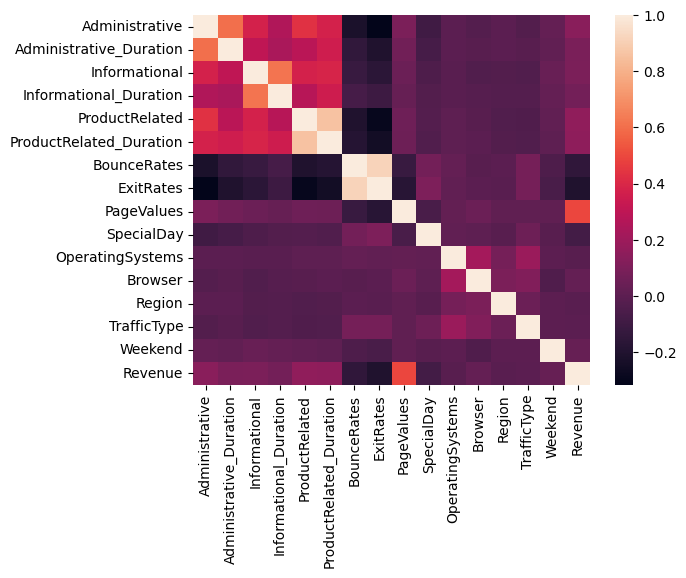

In [24]:
sns.heatmap(online_shoppers.corr())

Now we print a scatterplot for the pairs of variables for which we found a correlation

<AxesSubplot:xlabel='Administrative', ylabel='Administrative_Duration'>

<AxesSubplot:xlabel='Informational', ylabel='Informational_Duration'>

<AxesSubplot:xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

<AxesSubplot:xlabel='BounceRates', ylabel='ExitRates'>

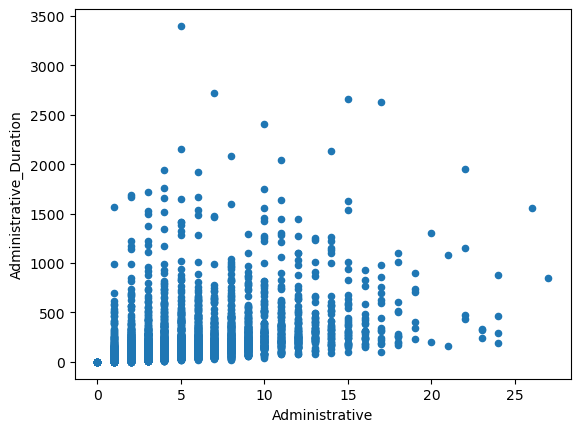

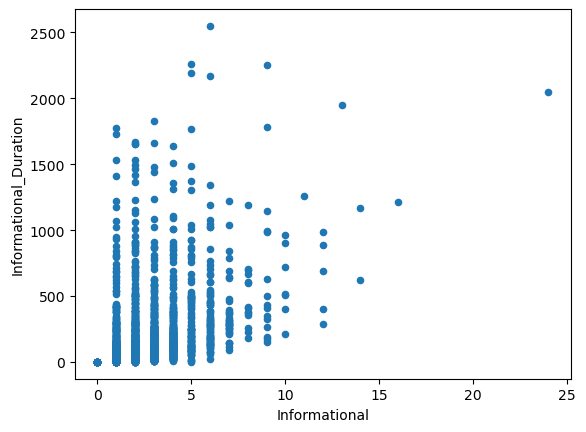

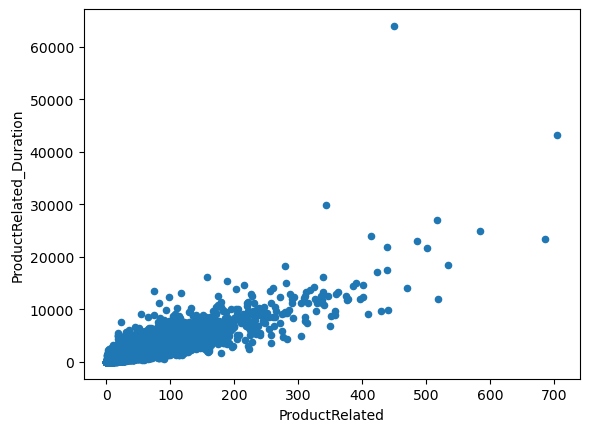

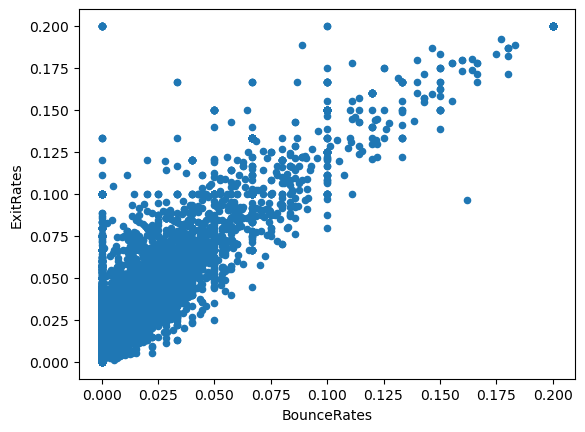

In [25]:
online_shoppers.plot.scatter('Administrative','Administrative_Duration')
online_shoppers.plot.scatter('Informational','Informational_Duration')
online_shoppers.plot.scatter('ProductRelated','ProductRelated_Duration')
online_shoppers.plot.scatter('BounceRates','ExitRates')

array(['Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep'], dtype=object)

Index(['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'], dtype='object')

['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb']

[3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]

<AxesSubplot:xlabel='Month'>

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

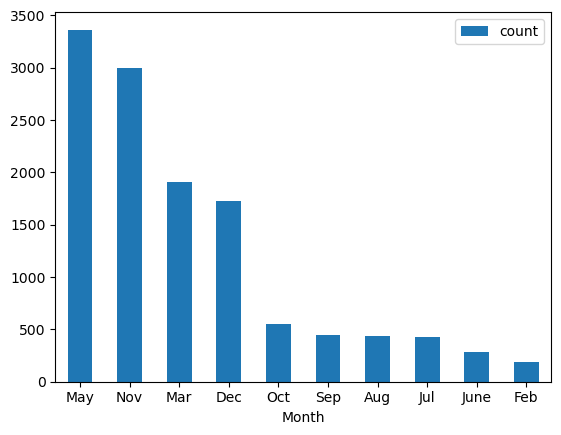

In [50]:
df = pd.DataFrame({'Month':list(online_shoppers['Month'].value_counts().index), 'count':list(online_shoppers['Month'].value_counts().values)})
df.plot.bar(x='Month', y='count', rot=0)

In [61]:
online_shoppers['Region'].value_counts()
online_shoppers['Region'].astype('category')

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

0        1
1        1
2        9
3        2
4        1
        ..
12325    1
12326    1
12327    1
12328    3
12329    1
Name: Region, Length: 12330, dtype: category
Categories (9, int64): [1, 2, 3, 4, ..., 6, 7, 8, 9]